In [1]:
import os
import shutil
import pickle
import navis
import numpy as np
import pandas as pd
from PIL import Image,ImageOps,ImageDraw, ImageFont
import nrrd# Some sample numpy
import plotly
import sys,os
sys.path.append('D:/code/neuron-vis/neuronvis/neuronVis')

import IONData as IONData
import SwcLoader as SwcLoader
sys.path.append('D://code//neuron-vis/core/code')

import GenerateterminalMatrix as GenerateterminalMatrix
import matplotlib.pyplot as plt
from collections import Counter
import HierarchicalClustering as HierarchicalClustering
from Plot import tSNE_Plot as tSNE_Plot
from Plot import Clustering_Plot as Clustering_Plot

from Plot import Soma_Dotplot as Soma_Dotplot
from sklearn import manifold, datasets
from scipy.cluster import hierarchy
import seaborn as sns
%matplotlib inline
iondata=IONData.IONData()
tree=SwcLoader.NeuronTree()
generatematrix=GenerateterminalMatrix.GenerateterminalMatrix()
clustering=HierarchicalClustering.HierarchicalClustering()
tsneplot=tSNE_Plot()
clusteringplot=Clustering_Plot()
 



In [37]:
f=open('D:\data\PF-fMOST\WT_fmost_analyzing/neuronlist.txt')
line = f.readline().strip() 
txt=[]
txt.append(line)
while line:  
   line = f.readline().strip()  
   txt.append(line)
f.close()  
print(txt)
neuronlist_WT=txt
neuronlist_WT=[x for x in neuronlist_WT if not x=='']
f=open('D:\data\PF-fMOST/total/143_crelistneuronlist.txt')
line = f.readline().strip() 
txt=[]
txt.append(line)
while line:  
   line = f.readline().strip()  
   txt.append(line)
f.close()  
print(txt)
neuronlist_cre=txt
neuronlist_cre=[x for x in neuronlist_cre if not x=='']
neuronlist=neuronlist_WT+neuronlist_cre

['210661077.swc', '220240001.swc', '220240004.swc', '220240006.swc', '220240031.swc', '220240033.swc', '220240035.swc', '220240036.swc', '220241010.swc', '220241011.swc', '220241012.swc', '220241014.swc', '220241015.swc', '220241018.swc', '220241019.swc', '220241020.swc', '220241021.swc', '220241022.swc', '220241023.swc', '220241024.swc', '220241025.swc', '220241026.swc', '220241027.swc', '220241028.swc', '220241029.swc', '220241031.swc', '220241032.swc', '220241033.swc', '220241034.swc', '220241035.swc', '220241036.swc', '220241043.swc', '220241046.swc', '220241053.swc', '220241054.swc', '220241055.swc', '220241056.swc', '220241058.swc', '220241059.swc', '220241060.swc', '220241061.swc', '220241062.swc', '']
['221624012.swc', '221624013.swc', '221624040.swc', '221624044.swc', '221624045.swc', '221624046.swc', '221624047.swc', '221624048.swc', '221624050.swc', '221624051.swc', '221624053.swc', '221624054.swc', '221624084.swc', '221624085.swc', '221624097.swc', '221624169.swc', '2216241

In [30]:
import Scene
isoproject=Scene.scene2List('E:/NeuronView/data/scene/genecalb1.nv')
neuronlist_calb=[x['sampleid']+x['name'] for x in isoproject]
isoproject=Scene.scene2List('E:/NeuronView/data/scene/geneTnc.nv')
neuronlist_tnc=[x['sampleid']+x['name'] for x in isoproject]
neuronlist=neuronlist_calb

In [38]:
import GenerateterminalMatrix as GenerateterminalMatrix
generatematrix=GenerateterminalMatrix.GenerateterminalMatrix()
generatematrix.generate_terminal_matrix(neuronlist,normalized=False,st_level=8,flip='left')
neurondata_st8=generatematrix.terminaldata
# terminal_tem=generatematrix.terminal_tem
json_error=neurondata_st8.sum()[neurondata_st8.sum()==0]
print('error in json',json_error)

210661077.swc
220240001.swc
220240004.swc
220240006.swc
220240031.swc
220240033.swc
220240035.swc
220240036.swc
220241010.swc
220241011.swc
220241012.swc
220241014.swc
220241015.swc
220241018.swc
220241019.swc
220241020.swc
220241021.swc
220241022.swc
220241023.swc
220241024.swc
220241025.swc
220241026.swc
220241027.swc
220241028.swc
220241029.swc
220241031.swc
220241032.swc
220241033.swc
220241034.swc
220241035.swc
220241036.swc
220241043.swc
220241046.swc
220241053.swc
220241054.swc
220241055.swc
220241056.swc
220241058.swc
220241059.swc
220241060.swc
220241061.swc
220241062.swc
221624012.swc
221624013.swc
221624040.swc
221624044.swc
221624045.swc
221624046.swc
221624047.swc
221624048.swc
221624050.swc
221624051.swc
221624053.swc
221624054.swc
221624084.swc
221624085.swc
221624097.swc
221624169.swc
221624170.swc
221624179.swc
221624180.swc
221612003.swc
221612004.swc
221612006.swc
221612007.swc
221612008.swc
221612016.swc
221612018.swc
221612019.swc
221612020.swc
221612032.swc
221612

D:/code/neuron-vis/neuronvis/neuronVis\GenerateterminalMatrix.py:178: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  neurondata_flip[i]=l_tem.to_list()+r_tem.to_list()
D:/code/neuron-vis/neuronvis/neuronVis\GenerateterminalMatrix.py:174: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  neurondata_flip[i]=r_tem.to_list()+l_tem.to_list()
D:/code/neuron-vis/neuronvis/neuronVis\GenerateterminalMatrix.py:174: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

In [39]:
#处理掉非基础脑区的信号，过低的噪音
neurondata_st8=neurondata_st8.loc[~(neurondata_st8==0).all(axis=1)]
region_st5_all=['Isocortex',
         'OLF',
         'HPF',
         'CTXsp',
         'STR',
         'PAL',
         'TH',
         'HY',
         'MB',
         'P',
         'MY',
         'CBX',
         'CBN']
 
primary_region=[x for x in neurondata_st8.index if not x[:x.index('.')] in region_st5_all]
neurondata_st8=neurondata_st8.loc[primary_region]
# neurondata_st8=neurondata_st8.drop(index='PF.left')
terminal_sum=neurondata_st8.sum()
propotion_terminal=neurondata_st8.div(terminal_sum)

region_tem=(neurondata_st8>0).sum(axis=1)
region_tem=region_tem[region_tem>10].index.to_list()#排除掉出现少于10次的脑区
neurondata_st8_screen=neurondata_st8.loc[region_tem]
neurondata_st8_screen=neurondata_st8_screen[neurondata_st8_screen>5]#排除掉terminal 数少的
propotion_terminal_log=neurondata_st8_screen.apply(np.log10)
propotion_terminal_log=propotion_terminal_log.fillna(0)
propotion_terminal_log


,210661077.swc,220240001.swc,220240004.swc,220240006.swc,220240031.swc,220240033.swc,220240035.swc,220240036.swc,220241010.swc,220241011.swc,...,231630013.swc,231630017.swc,231630023.swc,231630024.swc,231630025.swc,231630027.swc,231630028.swc,231630029.swc,231630030.swc,231630031.swc
AI.left,1.662758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GU.left,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MOs.left,0.000000,0.000000,0.000000,0.000000,1.000000,0.903090,1.863323,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.491362,0.000000,0.000000,1.447158,0.000000,1.230449
SSs.left,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ACA.left,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.301030,0.000000,0.000000,0.000000,1.544068,1.380211,1.505150,1.845098
ORB.left,0.000000,0.000000,0.000000,0.000000,1.431364,0.000000,0.000000,0.000000,0.000000,1.447158,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PL.left,0.000000,1.832509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.380211
FRP.left,0.000000,0.000000,0.000000,0.000000,0.778151,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MOp.left,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.385606,0.000000,0.000000,0.000000,0.000000,0.000000
SSp.left,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.326336,0.000000,0.000000,0.000000,0.000000,1.531479


In [48]:
#挑选雷达图绘制脑区
region_draw=['AI.left',
         'MOs.left',
         'SSs.left',
         'MOp.left',
         'SSp.left',
         'ACA.left',
         'SI.left',
         'ACB.left',
         'SNr.left',
         'CP.left',
         'RT.left',
         'GPi.left',
         'GPe.left',
         ]
for region in region_draw:
    if region not in propotion_terminal_log.index:
        # 添加一行全 0
        propotion_terminal_log.loc[region] = 0

# 按照 region_draw 的顺序重排
propotion_terminal_log = propotion_terminal_log.loc[region_draw]
target_area=['ACB.left']      
def pick_cluster(propotion_data, target_area):
    aim_cluster=propotion_data.loc[:,(propotion_data.loc[target_area[0]]!=0)]#&(propotion_data.loc[target_area[1]]==0)]
    return aim_cluster
mos_cp_cluster=pick_cluster(propotion_data=propotion_terminal_log, target_area=target_area)           

In [11]:
SIprojectedneuron=mos_cp_cluster.columns
with open("SIproject.pkl", "wb") as file:
    pickle.dump(SIprojectedneuron, file)

In [49]:
#绘图
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 示例数据：每个行名代表一个小提琴图

df =mos_cp_cluster
max_value = df.values.max()
# 设置极坐标
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 获取行名和列标签
row_labels = df.index.values

# 计算角度
angles = np.linspace(0, 2 * np.pi, len(row_labels), endpoint=False).tolist()
angles += angles[:1]

violin_color= "#D5732D"

# 绘制小提琴图
for i, row_label in enumerate(row_labels):
    values = df.loc[row_label].values
    angle = angles[i]
    vp=ax.violinplot([values], positions=[angle], widths=0.5, showmeans=False,showextrema=False)
# 设置小提琴图的颜色
    for pc in vp['bodies']:
        pc.set_facecolor(violin_color)
        pc.set_edgecolor(violin_color)
    
    mean_value = np.mean(values)
    ax.plot(angle, mean_value, 'o', markersize=3, color=violin_color)
# 设置标签和网格
ax.set_xticks(angles[:-1])
ax.set_xticklabels(row_labels,fontsize=20)
ax.xaxis.grid(True, linestyle='--')
# 设置径向刻度和标签
num_ticks = 5
tick_values = np.linspace(0, max_value, num_ticks)
ax.set_yticks(tick_values)
ax.set_yticklabels([f'{val:.1f}' for val in tick_values],fontsize=10)
ax.set_ylim(0, max_value)
plt.rcParams['pdf.fonttype'] = 42   # TrueType，可编辑
plt.rcParams['ps.fonttype'] = 42    # 避免转成 Type3
plt.savefig('D:/Figure/25/Figure 4/All_ACB_piechat.pdf')
plt.show()

## 绘制的是log 10 (terminal 分布百分比） 

In [15]:
neurondata_st8=neurondata_st8[neurondata_st8>5]
neurondata_st8=neurondata_st8.fillna(0)
def pick_cluster(propotion_data, target_area):
    if len(target_area)>1:
        aim_cluster=propotion_data.loc[:,(propotion_data.loc[target_area[0]]!=0)&(propotion_data.loc[target_area[1]]==0)]
        return aim_cluster
    elif len(target_area)==1:
        aim_cluster=propotion_data.loc[:,(propotion_data.loc[target_area[0]]!=0)]
        return aim_cluster
# target_area=['MOs.left','MOp.left']
# Mos_cluster=pick_cluster(propotion_data=neurondata_st8, target_area=target_area)
# Mos_neuronlist = list(Mos_cluster.columns.values)  
# target_area=['MOp.left']   
# Mop_cluster=pick_cluster(neurondata_st8,target_area)
# Mop_neuronlist = list(Mop_cluster.columns.values)
target_area=['ACA.left']   
ACA_cluster=pick_cluster(neurondata_st8,target_area)
ACA_neuronlist = list(ACA_cluster.columns.values)
target_area=['SI.left']   
SI_cluster=pick_cluster(neurondata_st8,target_area)
SI_neuronlist = list(SI_cluster.columns.values)
target_area=['ACB.left']   
ACB_cluster=pick_cluster(neurondata_st8,target_area)
ACB_neuronlist = list(ACB_cluster.columns.values)



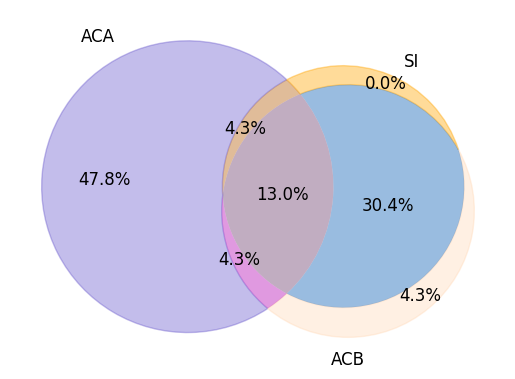

In [17]:
import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
set1=ACA_neuronlist
set1=set(set1)
set2=SI_neuronlist
set2=set(set2)
set3=ACB_neuronlist
set3=set(set3)
venn = venn3([set1, set2, set3], ('ACA', 'SI', 'ACB'))
venn.get_patch_by_id('100').set_color('SlateBlue')  # Set 1
venn.get_patch_by_id('010').set_color('Orange') # Set 2
venn.get_patch_by_id('001').set_color('PeachPUff')   # Set 3
# 显示图形

# 获取每个区域的数量
total = len(set1.union(set2))  # 总元素个数（不重复）

# 修改每个区域的标签为百分比
for subset in ('100', '010', '001', '110', '101', '011', '111'):
    label = venn.get_label_by_id(subset)
    if label:
        count = int(label.get_text())
        percent = count / total * 100
        label.set_text(f'{percent:.1f}%')
        label.set_fontsize(12)
plt.rcParams['pdf.fonttype'] = 42   # TrueType，可编辑
plt.rcParams['ps.fonttype'] = 42    # 避免转成 Type3
plt.savefig('D:/Figure/25/Figure 4/venn_tnc.pdf')
plt.show()
downstream={}
downstream['Aca_SI']=list(set1&set2-(set1&set2&set3))
downstream['Aca_ACB']=list(set1&set3-(set1&set2&set3))
downstream['SI_ACB']=list(set2&set3-(set1&set2&set3))
downstream['Aca_ACB_SI']=list(set1&set2&set3)
downstream['only_aca']=list(set1 - (set2 | set3))
downstream['only_SI']=list(set2 - (set1 | set3))
downstream['only_ACB']=list(set3 - (set1 | set2))
neuronlist_show=list(set1|set2|set3)